# COMPAS Recidivism Algorithm

This lecture describes in detail an investigation by ProPublica into an algorithmic system that makes decisions used in the US criminal justice system {cite}`MachineBias_2016`. Not only does the investigation audit an opaque decision making system that influences the fundamental rights of residents of the US, it also serves as a model for  thorough reproducible analyses.

All original materials for this study are publicly available:
* The original article: [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)
* A [methodological explanation](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm).
* A [GitHub Repository](https://github.com/propublica/compas-analysis) containing code and data.

## Introduction

Before laying out the events, actors, and details of this story, we'll start as *Machine Bias* does, by understanding how two different lives interact with the justice system. This tangible beginning sets the context for:
* (first and foremost) how such an algorithmic affects living, breathing, individuals,
* the need (or lack thereof) for this algorithmic system,
* what sorts of harms to these individuals result from poor decisions.

The article describes two separate incidents in Broward County, Florida:
1. After school in 2014, two 18-year-old girls, Brisha Borden and Sade Jones, briefly grabbed an unlocked bicycle and scooter and rode them down the street. Upon being confronted, they dropped the goods; the act seemed impulsive. Police arrived and arrested the girls for burglary and theft of \$80 worth of goods. One of the girls had previously had a minor run-in with the law, whereas the other had no record.
2. A 41-year-old man, Vernon Prater, was caught shoplifting \$86 worth of goods from Home Depot. He had prior convictions for armed robbery and had previously served fived years in prison.

Both groups were booked into jail, where a judge decides how to set bail: should they be released from jail, with some amount of money as collateral, while they await trial? Broward County uses an algorithmic decision making system, COMPAS, to assist the judge in making such decisions. In the end,
1. A judge set bail for Brisha Borden and Sade Jones at \$1000. COMPAS had labeled both of them high risk. A \$0 bail would not be unusual in a case like this (considering age and circumstance). Both spent the night in jail.
2. While the article doesn't mention bail amount for Vernon Prater, it does mentioned that COMPAS labeled him as low risk for pretrial release.

*Were the risk scores reasonable?* In the case of these defendants, COMPAS risk scores were exactly incorrect. The girls, labeled high-risk, were never again booked for a crime. On the other hand, Prater was later arrested for grand-theft and is serving time in prison.

*What harms came from these incorrect decisions?* Some care must be taken when drawing conclusions from the events that occurred, as it's unclear how the judges actually *used* the COMPAS risk assessments. 

In the case of Borden and Jones, evidence points toward the score influencing the judge's decisions for setting bail. The impact of COMPAS's poor decision resulted in the girls spending the night in jail. While not the case in Broward County, other counties use COMPAS scores in trial and sentencing as well. Similar poor algorithmic decisions elsewhere may impact the amount of time spent in prison (measured in years), future job prospects, and the right to vote.

In the case of Prater, the COMPAS risk assessment was incorrect in a very different way. Prater was given benefit of the doubt and the score may result in a more lenient treatment. The impact from the poor decision is the impact of the future crime Prater may have committed during that period of leniency.

*What explains such a discrepancy in COMPAS scores?* We will examine the details of the algorithm to attempt an answer to this question. Unfortunately, the COMPAS model is a *black box* proprietary model that we can only indirectly audit. ProPublica hypothesized the difference may be due to *race*. In this case, Broden and Janes are Black and Prater is white.

It's important to keep the humans behind the observations in datasets at the front of your mind. They ground and guide your data analyses,provide gut-checks when evaluating potential harms, and guide hypotheses. ProPublica also published four similar stories of people affected by COMPAS: [What Algorithmic Injustice Looks Like in Real Life](https://www.propublica.org/article/what-algorithmic-injustice-looks-like-in-real-life).

## Background on the justice system

The context in which the COMPAS risk-assessment algorithm makes decisions is the criminal justice system. This section will summarize the relevant components that someone must go through when experiencing the criminal justice system and briefly speak about existing biases present in these steps.

While reading the steps of criminal justice, think about the impact that experiencing each step may have on an individual. Each of these steps, even before trial, involve some loss of freedom. This loss impacts the stability of that individual's life, which in turn may affect the likelihood that the person interact with the criminal justice system in the future.

**Arrest** In order for an arrest to occur, an individual needs to come in contact with police and the officer must make a decision of whether that interaction justifies arresting the individual. The way this interaction plays out may lead to escalations that affect what may be considered an arrestable offence. Factors such as where police are staffed, the 'reputation' of the location where the contact occurs, the tendencies of the officer and surrounding witnesses all play a part in whether a citizen-police interaction ends in an arrest. Most citizen-police contact does *not* end in arrest, even when crime is involved.

**Arraignment** Once an individual is arrested, they are booked into jail. The government has 48 hours to charge the defendant with a crime, who then must plead 'guilty' or 'not guilty'. Whether the individual is charged with a crime is a decision made by government prosecutors (and affirmed by a judge).

**Pretrial detention or release (bail)** Once charged with a crime, a judge decides whether the defendant may be released from jail while the trial is pending (by posting bail) or if they must remain in detention through the trial. The risks weighed by a judge making this decision are:
1. Someone who must remain in custody while awaiting trial will be unable to work (and likely lose their job) and unable to care for their families. If someone is likely to return to court and not re-offend while out of custody, their life will experience less disruption.
1. Someone released pretrial may continue the destructive behavior for which they were arrested.
A judge may decide to attach a cash amount to the conditions of bail, which is forfeited if the defendant violates the condition of the pretrial release. Judges consider both the history of the defendant, as well as the nature of the crime in question when weighing the conditions of a potential pretrial release. The COMPAS risk-assessment is one factor that judges may take into account.

**Trial** Defendants stand trial for their crimes, either in front of a judge or jury, where they consider evidence about the crime in question. Sometimes, a witness may be called to present COMPAS scores as evidence of character during a trial.

**Sentencing** If a defendant is found guilty, the judge must determine the length and severity of the sentence. Such a sentence may include prison time, with possibilities for parole, or assignment to social services such as drug rehabilitation or therapy. The COMPAS risk-assessment is often used at this stage when considering parole or social services (i.e. actions that do not detain the individual). 

Each of these steps are primarily driven by individuals (e.g. police, judges, lawyers, jurors) making decisions, complete with human biases. Understanding how COMPAS is used by these individuals and how they interact with those human biases is just as important as understanding the biases inherent in the model.

## Description of COMPAS

The COMPAS algorithm was created by a professor of statistics, Tim Brennan, and a professional in the corrections industry, Dave Wells, as a tool for "Correctional Offender Management Profiling for Alternative Sanctions". The algorithm intends to provide risk-assessments for individuals in categories that they claim constitute a "full criminal profile". These assessments were meant to measure the likelihood that someone may re-offend (recidivism), whether someone may go on to commit a violent crime, along with explanatory variables that may point to resources that may help rehabilitate the inmate. As the algorithm primarily concerns itself with risk of recidivism, it is primarily meant to be used in making decisions of pretrial release (bail) and parole.

The model underlying COMPAS is closed-source and unknown to the public (including those who it affects). Below, we will use information that is available from Northpointe itself, alongside individuals that have taken surveys related to their COMPAS scores, to think through what creating such a risk-assessment tool might involve.

### Data

The data from which the risk-scores are derived come from a combination of answers to a 137 question survey (which you can read [here](https://www.documentcloud.org/documents/2702103-Sample-Risk-Assessment-COMPAS-CORE.html)) and the defendant's criminal record. These variables include:
* Prior arrests and convictions
* Address of the defendant
* Whether the defendant a suspected gang member
* Whether the defendant ever violated parole
* If the defendant's parents separated
* If friends/acquaintances of the defendant were ever arrested
* Whether drugs are available in the defendants neighborhood
* How often the defendant has moved residences
* The defendants high school GPA
* How much money the defendant has
* How often the defendant feels bored or sad

One variable that *doesn't* appear is the defendant's race. However, many of the variables used in COMPAS are strongly correlated with race, which is built into the structure and history of the criminal justice system in the United States.

```{admonition} Question
Consider the frameworks of justice and equality in lecture 2. Each variable captures a characteristic of the defendant's life. Which of these characteristics should be considered in a ralwsian framework and in a luck-egalitarian framework? Which of these variables captures a characteristic that results from individual choice? which characteristics does the defendant have no control over? How should each of these be used?
```

### Outcome

The true outcome being modeled by COMPAS is whether a defendant will commit another (felony) crime upon early release from custody. The term 'felony' helps dodge the fact that, in such a complicated penal code, almost every US resident commits a crime over a given year. For example, when considering releasing an individual charged with murder, the likelihood that they may jaywalk upon release seems irrelevant.

This true outcome is unobservable and requires simplification in a number of ways:
* A time-frame must be set for observing whether someone re-offends. Northpointe uses a two years.
* To be observed re-offending, the police must come into contact with, arrest, and charge the defendant. There will be defendants in the training set that are incorrectly labeled as a 'non-re-offender', only because they committed a crime that wasn't pursued. 

There will likely be bias in this mislabeling of re-offenders due to studied police behavior favoring white communities over Black communities: if Black communities experience more police contact, they are more likely to be prosecuted for crime, even if crime rates are the same in Black and white communities.


### How the score is used in practice

The COMPAS score is used at the pretrial detention, trial, sentencing, and parole steps of the justice system. Given that the risk-assessment is supposed to model 'likelihood of re-offending' of a certain type, the developers of COMPAS only recommend using the algorithm to judge decisions like early release with access to social services. However, once the score became available to the criminal justice system as a whole, it became used in wholly inappropriate ways. For example, whether someone may commit another crime in the future has no bearing on whether they did or did not commit the current crime in question.

The score itself also doesn't actually make the decision. It's another piece of information that judges and juries use when making more holistic decisions. However, as the output of this model is nothing more than an integer, it doesn't explain to the decision maker how to weight this information.

Moreover, even when used correctly, COMPAS likely confuses correlation for causation. One use of the COMPAS score is to help allocate over-burdened social services, like drug rehabilitation, to those who may benefit from them. Those at low risk to re-offend and who are in need of those services, should receive priority to use them. However, research shows that those with access to social services are in a better position to avoid arrest in the future. With this property present in training data, the model would learn to allocate these services to precisely those who already have them. (Note: there are statistical approaches to accounting for this confounding; as COMPAS is closed-source, we do not know how the model approaches this problem).

## Analysis of Fairness

We will now audit the COMPAS algorithm on data collected by ProPublica via the Freedom of Information Act. This dataset comes from pretrial detention hearings in Broward County, Florida, in 2013.

In [196]:
# HIDDEN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
pd.set_option('display.max_rows', 7)

The variables we would like to examine are: sex/gender, race/ethnicity, age, purpose of assessment (e.g. pretrial release), type of assessment (recidivism, violent recidivism), and the risk-score itself.

In [35]:
defendants = pd.read_csv('https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-raw.csv')

with pd.option_context('display.max_rows', 30):
    print(defendants.loc[[32647, 5032]].drop(['FirstName', 'LastName', 'MiddleName'], axis=1).T)

                                      32647               5032 
Person_ID                             60304               52305
AssessmentID                          69187               58972
Case_ID                               62725               53582
Agency_Text                        PRETRIAL           Probation
Sex_Code_Text                          Male                Male
Ethnic_Code_Text           African-American           Caucasian
DateOfBirth                        07/05/95            05/04/89
ScaleSet_ID                              22                  22
ScaleSet                 Risk and Prescreen  Risk and Prescreen
AssessmentReason                     Intake              Intake
Language                            English             English
LegalStatus                        Pretrial       Post Sentence
CustodyStatus                   Jail Inmate           Probation
MaritalStatus                        Single              Single
Screening_Date                 1/10/14 0

We will restrict ourselves to looking at COMPAS scores for 'Risk of Recidivism':

In [39]:
defendants = defendants[defendants.DisplayText == 'Risk of Recidivism']

The number of defendants screened by COMPAS for Risk of Recidivism is:

In [107]:
len(defendants)

20281

Almost 80% of defendants are classified as male, while the white and Black defendants comprise of approximately 75% of the total population of defendants.

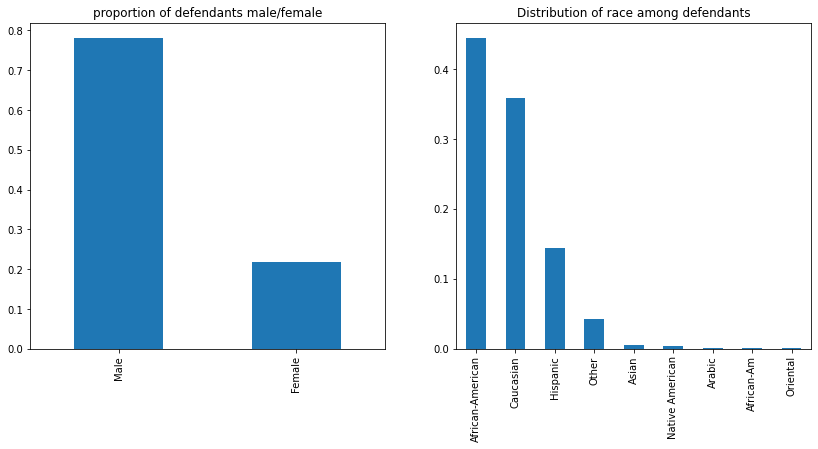

In [49]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

(
    defendants.Sex_Code_Text.value_counts(normalize=True)
    .plot(kind='bar', title='proportion of defendants male/female', ax=axes[0])
)

(
    defendants.Ethnic_Code_Text.value_counts(normalize=True)
    .plot(kind='bar', title='Distribution of race among defendants', ax=axes[1])
);

The majority of uses for the risk assessment are in the pretrial release context. Overall, after the lowest risk score, the recidivism deciles taper off:

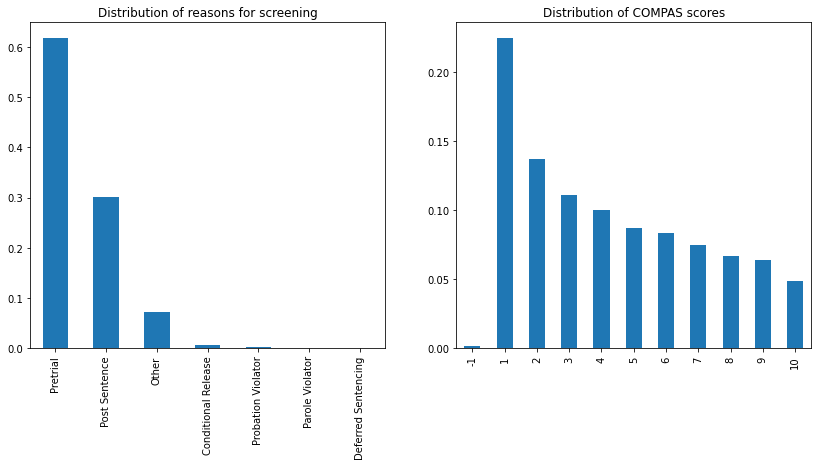

In [50]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

(
    defendants.LegalStatus.value_counts(normalize=True)
    .plot(kind='bar', title='Distribution of reasons for screening', ax=axes[0])
)

(
    defendants.DecileScore.value_counts(normalize=True).sort_index()
    .plot(kind='bar', title='Distribution of COMPAS scores', ax=axes[1])
);

There is a qualitative difference in the distributions among the Black and white defendants.
* White defendants' scores are concentrated at the 'low risk' end of the distribution
* Black defendants' scores are roughly evenly distributed across the deciles

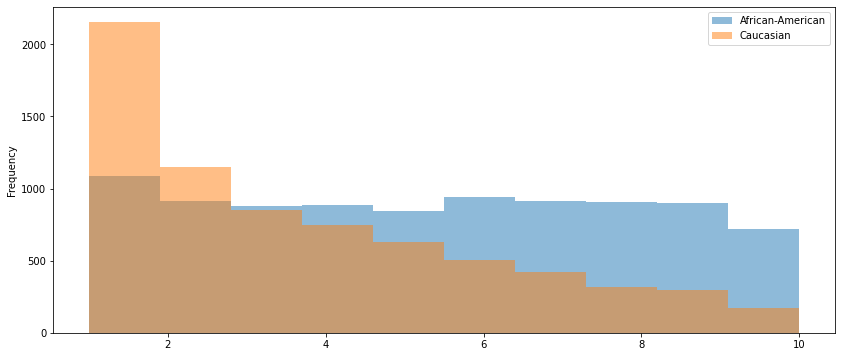

In [59]:
(
    defendants
    .loc[defendants.Ethnic_Code_Text.isin(['African-American', 'Caucasian'])]
    .loc[defendants.DecileScore > 0]
    .groupby('Ethnic_Code_Text')
    .DecileScore
    .plot(kind='hist', alpha=0.5, legend=True, figsize=(14,6))
);

ProPublica also conducted public records research to determine which defendants re-offended in the two years following their COMPAS screening. They were able to follow up on approximately *half* the defendants. See ProPublica's methodology for how this dataset was collected and joined to the one above.

This dataset contains a field `two_year_recid` that is 1 if the defendant re-offended within two years of screening and 0 otherwise. We will concern ourselves with comparing the Black and white populations, as in the article. Similarly, we will consider a COMPAS score of either 'Medium' or 'High' to be a prediction that the defendant will re-offend within two years.

In [209]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
recidivism = (
    pd.read_csv(url)
    [['age_cat', 'sex', 'race', 'decile_score', 'score_text', 'two_year_recid']]
    .loc[lambda x:x.race.isin(['African-American', 'Caucasian'])]
    .assign(COMPAS_Decision=lambda x:x['score_text'].replace({'Low': 0, 'Medium':1, 'High': 1}))
)

The COMPAS algorithm, on the dataset as a whole, is relatively balanced. We list a few observations about the COMPAS algorithms decisions, on average, for the population of study:
* Half the predicted defendants would re-offend (and half predicted not), which is slightly less than the actual proportion of re-offenders.
* 35% of the population experienced an incorrect decision, roughly balanced between false positives and false negatives.

The table below summarizes these statistics:

In [168]:
pd.crosstab(recidivism['COMPAS_Decision'], recidivism['two_year_recid'], normalize=True, margins=True)

two_year_recid,0,1,All
COMPAS_Decision,,,
0,0.346179,0.161463,0.507642
1,0.187642,0.304715,0.492358
All,0.533821,0.466179,1.000000


When looking at the Black and white populations separately, a different picture emerges: 
* a greater proportion of Black defendants experience an incorrect (strict) "will re-offend" prediction than their white counterparts.
* a greater proportion of white defendants experience an incorrect (lenient) "won't re-offend" prediction than their Black counterparts.
* This balance is necessary, as the difference in incorrect prediction types in the overall population is balanced.

In [171]:
b_recid = recidivism[recidivism['race'] == 'African-American']
w_recid = recidivism[recidivism['race'] == 'Caucasian']

pd.concat([
    pd.crosstab(b_recid['COMPAS_Decision'], b_recid['two_year_recid'], normalize=True, margins=True),
    pd.crosstab(w_recid['COMPAS_Decision'], w_recid['two_year_recid'], normalize=True, margins=True)    
], axis=1, keys=['Black', 'White'])

Black                         White                    
two_year_recid          0         1       All         0         1       All
COMPAS_Decision                                                            
0                0.267857  0.143939  0.411797  0.464140  0.187857  0.651997
1                0.217803  0.370400  0.588203  0.142217  0.205786  0.348003
All              0.485660  0.514340  1.000000  0.606357  0.393643  1.000000

However, note that the *true* outcomes of Black and white defendants differ. We should instead consider evaluation metrics that normalize for this difference.

### Accuracy Analysis

First, we will look at the accuracy of the COMPAS predictions (the proportions of predictions that were correct).

In [175]:
print(
    'accuracy (All):  \t %f' % metrics.accuracy_score(recidivism.two_year_recid, recidivism.COMPAS_Decision), 
    'accuracy (Black):\t %f' % metrics.accuracy_score(b_recid.two_year_recid, b_recid.COMPAS_Decision), 
    'accuracy (White):\t %f' % metrics.accuracy_score(w_recid.two_year_recid, w_recid.COMPAS_Decision),
    sep='\n'
)

accuracy (All):  	 0.650894
accuracy (Black):	 0.638258
accuracy (White):	 0.669927


While the COMPAS algorithm performs better on the white population, these accuracies seem fairly close. We can check if this different is significant, using a 5% significance level. (We will use a permutation test to compute the p-value, for visualizing the variation).

The difference in accuracies of the algorithm, between the white and black defendants, is approximately 3%:

In [210]:
obs = (
    recidivism
    .groupby('race')
    .apply(lambda x: metrics.accuracy_score(x.two_year_recid, x.COMPAS_Decision))
    .diff()
    .iloc[-1]
)

obs

0.03166907460917234

Running a permutation test results in a p-value of approximately 1%, which leads us to reject the hypothesis that this difference in accuracies occurred by chance:

0.006


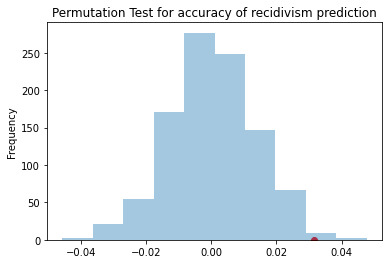

In [211]:
metrs = []
for _ in range(1000):
    s = (
        recidivism
        .assign(race=recidivism.race.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('race')
        .apply(lambda x: metrics.accuracy_score(x.two_year_recid, x.COMPAS_Decision))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)  
    
print(pd.Series(metrs >= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for accuracy of recidivism prediction', alpha=0.4)
plt.scatter(obs, 0, c='r');

On the one hand, this difference *is* significant. On the other hand, the algorithm's quality is still in the same ballpark for both groups. Whether you find this to be a problem, really depends on how strongly you believe egalitarianism to play a role in this discussion. We will read, for example, about theories of *sufficiency* in subsequent weeks, which may assert that any performance over some fixed score (e.g. 60%) is 'good enough'. As of today, there is not consensus in the legal system for how to evaluate such algorithms.

### Other measures of quality

The argument over accuracy, however, is a distraction. Accuracy is *not* the best measure, as false positives and false negatives have *drastically* different meanings. Instead, we should consider these different types of errors separately.
* The False Negative Rate captures the proportion of incorrect "won't re-offend" predictions among all those that actually did re-offend.
* The False Positive Rate captures the proportion of incorrect "will re-offend" predictions among all those that did not actually re-offend.

Using these metrics for evaluation, we observe:
* Among the Black defendants, almost half of all true non-re-offenders were incorrectly labeled to be held in custody.
* Among white defendants, almost half of all true re-offenders were incorrectly labeled low risk, to be released from custody.

Both of these observations, even from the perspective of sufficiency, point to COMPAS failing *both* of these populations in very different ways: Black defendants are disproportionately punished, while white defendants are disproportionately given leniency. The table below summarizes these observations:

In [213]:
def calc_metrics(df):
    
    conf = metrics.confusion_matrix(df.two_year_recid, df.COMPAS_Decision)
    TP = conf[1,1]
    TN = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
    
    fnr = FN / (TP + FN)
    fpr = FP / (FP + TN)
    acc = (TP + TN) / (TP + TN + FP + FN)
    
    return pd.Series({'FNR': fnr, 'FPR': fpr, 'ACC': acc})

pd.concat([
    calc_metrics(recidivism).rename('ALL').to_frame().T,
    recidivism.groupby('race').apply(calc_metrics)
])

,FNR,FPR,ACC
ALL,0.346355,0.351508,0.650894
African-American,0.279853,0.448468,0.638258
Caucasian,0.477226,0.234543,0.669927
